## Отвечаемость 

- В исследовании участвуют только спецы, зарегистрировавшиеся с 1 января 2020.
- Смотрим только ЛГ заказы.
- Учитывается только первый ответ спеца на приглашение (если была дальнейшая переписка, то она уже не учитывается).
- Пока не учитываем отмену заказа и выбор клиентом спеца.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import math
import pandas
import statistics
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
def percentile(N, percent, key=lambda x: x):
    if not N:
        return None
    k = (len(N) - 1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return key(N[int(k)])
    d0 = key(N[int(f)]) * (c - k)
    d1 = key(N[int(c)]) * (k - f)
    return d0 + d1

def show_usual_stats(data):
    if len(data) == 0:
        print 'No data'
        return 
    data = sorted(data)
    print "Percentile 25% = ", percentile(data, 0.25)
    print "Percentile 50% = ", percentile(data, 0.5)
    print "Percentile 75% = ", percentile(data, 0.75)
    print "Percentile 95% = ", percentile(data, 0.95)
    print "\nAverage = ", round(sum(data) * 1.0 / len(data), 2)
    print "MAX = ", max(data)
    print "Data len: ", len(data)

In [4]:
column_names = ['order_city_id', 'project_name', 'prep_id', 'prep_dt', 'order_id', 
                'invite_id', 'invite_dt', 'invite_txt', 'invite_code', 
                'answer_id', 'answer_dt', 'answer_txt', 'answer_code']

df = pandas.read_csv('invites_answers_events.tsv', delimiter='\t', header=None, names = column_names, 
                     parse_dates = ['prep_dt', 'invite_dt', 'answer_dt'])
print df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62872 entries, 0 to 62871
Data columns (total 13 columns):
order_city_id    62872 non-null object
project_name     62872 non-null object
prep_id          62872 non-null object
prep_dt          62872 non-null datetime64[ns]
order_id         62872 non-null int64
invite_id        62872 non-null int64
invite_dt        62872 non-null datetime64[ns]
invite_txt       151 non-null object
invite_code      62872 non-null object
answer_id        24403 non-null float64
answer_dt        24403 non-null datetime64[ns]
answer_txt       20239 non-null object
answer_code      24403 non-null object
dtypes: datetime64[ns](3), float64(1), int64(2), object(7)
memory usage: 6.2+ MB
None


,order_city_id,project_name,prep_id,prep_dt,order_id,invite_id,invite_dt,invite_txt,invite_code,answer_id,answer_dt,answer_txt,answer_code
0,sochi.mstr,«МастерДел»,7774V,2020-01-23,26780723,1373455745,2020-03-10 22:04:07,NaN,o_pchosen,1.373464e+09,2020-03-10 22:13:47,<div prch=7040>Не подходит бюджет</div>,r_order_refused
1,smolensk.krst,«Крэйс–Мастерс»,A-7,2020-01-13,26594715,1364572723,2020-03-02 14:37:36,NaN,o_pchosen,NaN,NaT,NaN,NaN
2,chechnya-dmstf,Новые вертикали,AAA63,2020-01-08,26947517,1381135170,2020-03-17 21:45:11,NaN,o_pchosen,NaN,NaT,NaN,NaN
3,penza.mstr,«МастерДел»,AAA70,2020-02-01,26063163,1337092178,2020-02-10 13:57:02,NaN,o_pchosen,1.337132e+09,2020-02-10 14:15:56,"<b>ev_code=r_zayavka, cancel_dt=2020-03-08 19:...",r_zayavka0
4,penza.mstr,«МастерДел»,AAA70,2020-02-01,26063163,1337092178,2020-02-10 13:57:02,NaN,o_pchosen,1.371271e+09,2020-03-08 19:56:11,"<b>ev_code=r_order_refused, cancel_dt=2020-04-...",r_order_refused0


## Сколько всего препов получают приглашения от клиента
Под приглашениями имеются в виду нажатия на кнопку "Предложить заказ" и "Написать сообщение"

In [6]:
print 'Число уникальных препов за период: ', df.prep_id.nunique()

Число уникальных препов за период:  20397


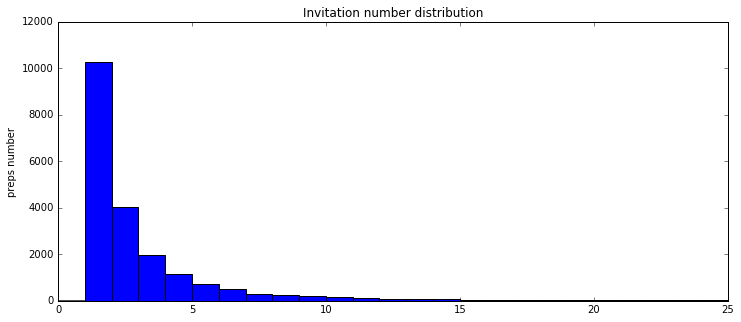

In [9]:
plt.figure(figsize=(12,5))
df.groupby(['prep_id'])['invite_id'].count().plot.hist(bins = 25, range = (0,25))
plt.title("Invitation number distribution")
plt.ylabel('preps number')
plt.show()

In [10]:
print 'Препы, у которых максимальное количество приглашений:'
print df.groupby(['prep_id'])['invite_id'].count().sort_values(ascending=False)[:10]

Препы, у которых максимальное количество приглашений:
prep_id
OzerovaZB2       607
ErshovAS14       183
MaltsevaAA29     172
KarimovSR4       156
ShastinAV        143
KomissarovaVI    132
IvanovaAU48      128
SaprykinaTM      128
FrolovRO2        127
TishaiRR         122
Name: invite_id, dtype: int64


Очень подозрительная OzerovaZB2 (маникюр) - целых 607 приглашений. А отправила она всего 38 заявок.<br>
Посмотрим на неё поближе.

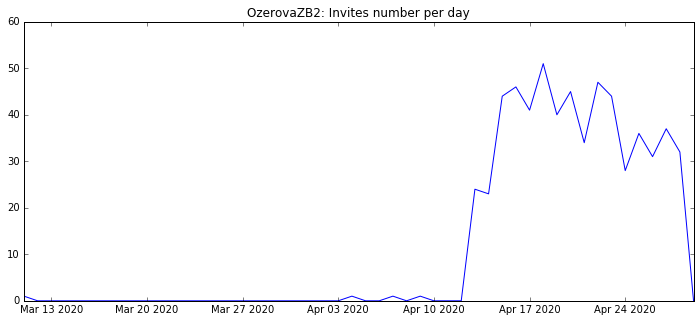

In [11]:
ozerova = df[df['prep_id'] == 'OzerovaZB2']
ozerova['invite_dt'] = ozerova['invite_dt'].dt.date

# ozerova.groupby(['invite_dt'])['invite_id'].count()

ozerova_invites_per_day = []
dates = [ozerova['invite_dt'].min() + timedelta(n) for n in range(50)]
for single_date in (ozerova['invite_dt'].min() + timedelta(n) for n in range(50)): 
    ozerova_invites_per_day.append(ozerova[ozerova['invite_dt'] == single_date]['invite_id'].count()) 

plt.figure(figsize=(12,5))
plt.plot(dates, ozerova_invites_per_day)
plt.title('OzerovaZB2: Invites number per day')
plt.show()

13 апреля у Озёровой ЧТО-ТО случилось, и она стала получать по 40-50 приглашений в день. Возможно, дело в карантине. А возможно дело в том, что 12 апреля она получила четвертый отзыв, и это как-то повлияло на её позицию в листинге.

In [12]:
df_preps_invites_count = df.groupby(['prep_id'])['invite_id'].count()
print 'Процент препов, у которых всего 1 приглашение: ', \
        round(len(df_preps_invites_count[df_preps_invites_count == 1])*100.0/df.prep_id.nunique(), 2), '%'

Процент препов, у которых всего 1 приглашение:  50.35 %


## % отвеченных приглашений


In [ ]:
## TESTING
# prep_id = 'kosorukovAA4'
# df[df['prep_id'] == prep_id]['answer_id'].isnull().sum() * 100.0 / df[df['prep_id'] == prep_id]['order_id'].count()

In [13]:
df_preps_answers_count = df[df['answer_id'] > 0].groupby(['prep_id'])['order_id'].count()
df_preps_answers_percent = df_preps_answers_count * 100.0 / df_preps_invites_count

In [14]:
def show_hist_of_answer_percent(INVITES_N = 1):
    answers_percent_list = []
    for prep_id in df_preps_invites_count[df_preps_invites_count >= INVITES_N].index:
        if df_preps_answers_percent[prep_id] > 0:
            answers_percent_list.append(df_preps_answers_percent[prep_id])
        else:
            answers_percent_list.append(0)

    show_usual_stats(answers_percent_list)
    plt.figure(figsize=(12,5))
    plt.hist(answers_percent_list, bins = 25)
    plt.show()

Смотрим препов, у которых хотя бы 1 приглашение (просто чтобы понять, какой беспорядок тут в распределении).<br>
Видим небольшой пик на 50% (во многом это те, у кого 2 приглашения и 1 из них отвечено).<br>
Пик на 100% (во многом это те, у кого 1 приглашение и оно отвечено).

Percentile 25% =  0
Percentile 50% =  0
Percentile 75% =  66.6666666667
Percentile 95% =  100.0

Average =  30.4
MAX =  100.0
Data len:  20397


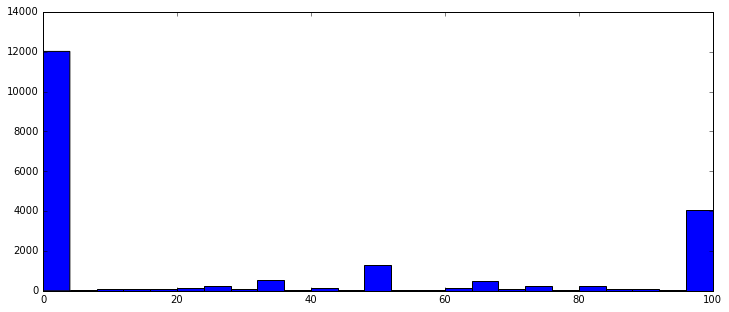

In [15]:
show_hist_of_answer_percent(1)

Теперь смотрим препов, у которых хотя бы 5 приглашений. (таких 14.5%)

Percentile 25% =  3.23660714286
Percentile 50% =  40.0
Percentile 75% =  73.0509355509
Percentile 95% =  100.0

Average =  41.5
MAX =  100.0
Data len:  2958


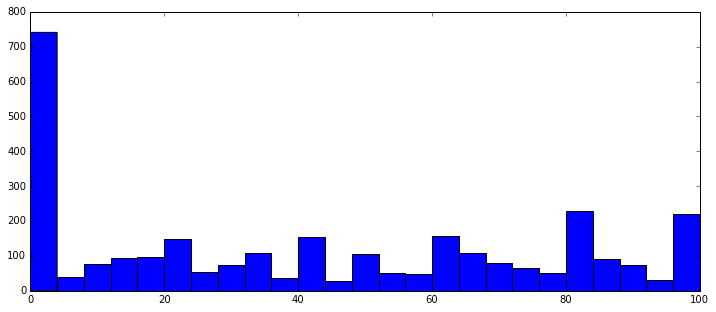

In [16]:
show_hist_of_answer_percent(5)

Теперь смотрим препов, у которых хотя бы 20 приглашений. (таких 1.5%)<br>
Здесь с большой натяжкой можно увидеть гаусса справа. 

Percentile 25% =  22.2258273848
Percentile 50% =  64.2893145161
Percentile 75% =  84.1538461538
Percentile 95% =  95.1547619048

Average =  54.04
MAX =  100.0
Data len:  308


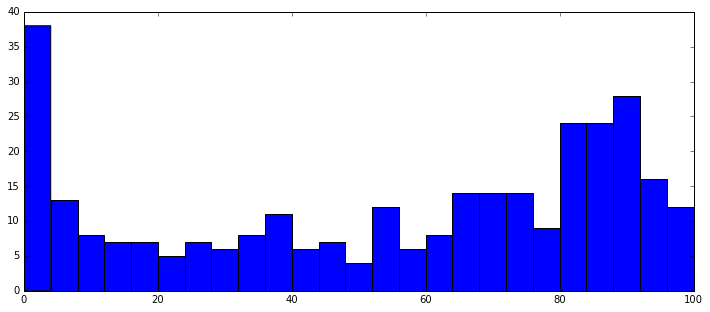

In [17]:
show_hist_of_answer_percent(20)

In [18]:
# round(len(df_preps_invites_count[df_preps_invites_count >= 20])*100.0/df.prep_id.nunique(), 2)